<a href="https://colab.research.google.com/github/PhantomBlade009/ISLR_LinReg_Solutions/blob/main/Boston(Lab_and_Q15).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Question 15 solution below

#Lab part and Self 

In [2]:
import pandas as pd
import numpy as np
 

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/mscaudill/IntroStatLearn/master/data/Boston.csv')

In [4]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
#Dropped the first column
df.drop(axis=1, columns= df.columns[0], inplace = True )
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [7]:
X = df.iloc[:,0:df.shape[1]-1].values
y = df.iloc[:,df.shape[1]-1].values.reshape(-1,1)
print(X.shape, y.shape)

(506, 13) (506, 1)


In [8]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

In [9]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()

In [10]:
lr.fit(X_norm, y)
y_predict = lr.predict(X_norm)

In [27]:
def summary(X, y, y_predict, lr):
  from scipy import stats
  from sklearn.metrics import r2_score 
  from sklearn.metrics import mean_squared_error

  n = X.shape[0] 
  p = X.shape[1] 
  R2 = r2_score(y,y_predict) 
  adjusted_r2 = 1- (1-R2)*((n-1)/(n-p-1)) 
  RMSE = mean_squared_error(y,y_predict)**(1/2) 
  print("RMSE = ", RMSE) 
  print("R2 Score = ", R2)
  print("Adjusted R2 =" ,adjusted_r2) 

  weights = np.append(lr.intercept_,lr.coef_)

  #newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
  #MSE = (mean_squared_error(y, y_predict_tot))/(len(newX)-len(newX.columns))

  # Note if you don't want to use a DataFrame replace the two lines above with
  newX = np.append(np.ones((len(X),1)), X, axis=1)
  MSE = (sum((y-y_predict)**2))/(newX.shape[0]-newX.shape[1])


  var_b = MSE*(np.linalg.pinv(np.dot(newX.T,newX)).diagonal())
  sd_b = np.sqrt(var_b)
  ts_b = weights/ sd_b

  p_values =[2.0*(1.0-stats.t.cdf(np.abs(i),(newX.shape[0]-newX.shape[1]))) for i in ts_b]

  sd_b = np.round(sd_b,3)
  ts_b = np.round(ts_b,3)
  p_values = np.round(p_values,100)
  weights = np.round(weights,4)

  myDF3 = pd.DataFrame()
  myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [weights,sd_b,ts_b,p_values]
  print(myDF3)

  interval_95 = pd.DataFrame(np.column_stack((weights-2*sd_b, weights+2*sd_b)), columns=['LowerBound', 'UpperBound'])
  print('95 per intervals')
  print(interval_95)
  return

In [28]:
summary(X_norm,y,y_predict,lr)

RMSE =  4.679191295697282
R2 Score =  0.7406426641094094
Adjusted R2 = 0.7337897263724629
    Coefficients  Standard Errors  t values  Probabilities
0        36.4595            0.211   172.831       0.000000
1        -0.1080            0.282    -0.382       0.702283
2         0.0464            0.320     0.145       0.884663
3         0.0206            0.421     0.049       0.961115
4         2.6867            0.219    12.290       0.000000
5       -17.7666            0.442   -40.179       0.000000
6         3.8099            0.293    12.987       0.000000
7         0.0007            0.371     0.002       0.998514
8        -1.4756            0.420    -3.517       0.000477
9         0.3060            0.577     0.530       0.596143
10       -0.0123            0.633    -0.019       0.984465
11       -0.9527            0.283    -3.367       0.000819
12        0.0093            0.245     0.038       0.969694
13       -0.5248            0.362    -1.450       0.147585
95 per intervals
    Lowe

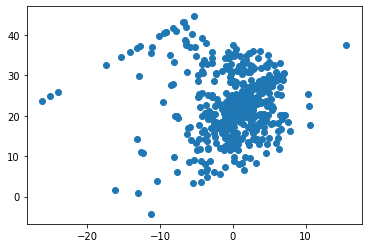

In [29]:
import matplotlib.pyplot as plt 
plt.scatter(y_predict-y, y_predict)

In [30]:
from sklearn.preprocessing import PolynomialFeatures 
poly = PolynomialFeatures(degree = 2, include_bias = False, interaction_only = True) 
X_norm = poly.fit_transform(X_norm)

In [31]:
lr.fit(X_norm, y)
y_predict = lr.predict(X_norm)

In [32]:
summary(X_norm,y,y_predict,lr)

RMSE =  2.5794001227398327
R2 Score =  0.9211876335753
Adjusted R2 = 0.9038641424046534
    Coefficients  Standard Errors  t values  Probabilities
0        36.3908            6.527     5.575   4.467968e-08
1        36.8834           16.227     2.273   2.354193e-02
2        32.6516           14.596     2.237   2.581169e-02
3        -0.8710           10.552    -0.083   9.342576e-01
4         1.8761            0.481     3.899   1.126197e-04
..           ...              ...       ...            ...
87       -0.0073            3.070    -0.002   9.980915e-01
88       -1.6854            1.451    -1.162   2.459402e-01
89        0.2374            0.663     0.358   7.205080e-01
90        0.0602            0.461     0.131   8.960685e-01
91       -0.3980            0.270    -1.472   1.418367e-01

[92 rows x 4 columns]
95 per intervals
    LowerBound  UpperBound
0      23.3368     49.4448
1       4.4294     69.3374
2       3.4596     61.8436
3     -21.9750     20.2330
4       0.9141      2.8381
..

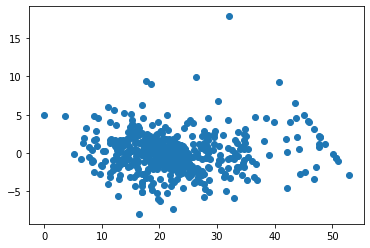

In [33]:
#Residual Plot  
plt.scatter(y_predict, y - y_predict )

In [34]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


**Question** **15**

In [39]:
X = df.iloc[:,1:df.shape[1]].values
X = X.astype(np.float) 
y= df.iloc[:,0].values.reshape(-1,1)

In [40]:
single_wts = np.zeros((X.shape[1],1))
single_wts.shape

(13, 1)

In [41]:
for i in range(X.shape[1]):
  Xtemp = X[:,i].reshape(-1,1)
  lr.fit(Xtemp,y) 
  y_predict = lr.predict(Xtemp)
  summary(Xtemp, y, y_predict, lr) 
  print('____________________________________________________')
  single_wts[i] = lr.coef_[0]

RMSE =  8.418602620494738
R2 Score =  0.04018790803211081
Adjusted R2 = 0.038283518960746
   Coefficients  Standard Errors  t values  Probabilities
0        4.4537            0.417    10.675       0.000000
1       -0.0739            0.016    -4.594       0.000006
95 per intervals
   LowerBound  UpperBound
0      3.6197      5.2877
1     -0.1059     -0.0419
____________________________________________________
RMSE =  7.850720005720037
R2 Score =  0.16531007043075152
Adjusted R2 = 0.16365393961811414
   Coefficients  Standard Errors  t values  Probabilities
0       -2.0637            0.667    -3.093       0.002091
1        0.5098            0.051     9.991       0.000000
95 per intervals
   LowerBound  UpperBound
0     -3.3977     -0.7297
1      0.4078      0.6118
____________________________________________________
RMSE =  8.579609085341941
R2 Score =  0.0031238689633057426
Adjusted R2 = 0.0011459401318837381
   Coefficients  Standard Errors  t values  Probabilities
0        3.7444     

In [ ]:
import seaborn as sns 
sns.pairplot(df, )

In [42]:
lr.fit(X,y)
y_predict = lr.predict(X) 
summary(X,y, y_predict, lr)

RMSE =  6.349493616836943
R2 Score =  0.45401038980421504
Adjusted R2 = 0.4395838350632695
    Coefficients  Standard Errors  t values  Probabilities
0        17.0332            7.235     2.354   1.894909e-02
1         0.0449            0.019     2.394   1.702489e-02
2        -0.0639            0.083    -0.766   4.442940e-01
3        -0.7491            1.180    -0.635   5.258670e-01
4       -10.3135            5.276    -1.955   5.115200e-02
5         0.4301            0.613     0.702   4.830888e-01
6         0.0015            0.018     0.081   9.354878e-01
7        -0.9872            0.282    -3.503   5.022039e-04
8         0.5882            0.088     6.680   6.460454e-11
9        -0.0038            0.005    -0.733   4.637927e-01
10       -0.2711            0.186    -1.454   1.466113e-01
11       -0.0075            0.004    -2.052   4.070233e-02
12        0.1262            0.076     1.667   9.620842e-02
13       -0.1989            0.061    -3.287   1.086810e-03
95 per intervals
    Low

In [43]:
multi_wts = lr.coef_.T

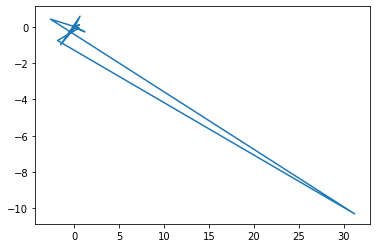

In [44]:
plt.plot(single_wts, multi_wts)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


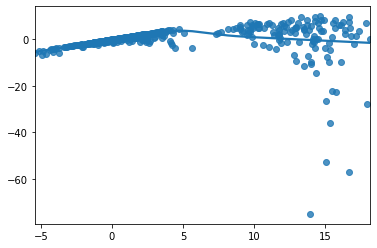

In [45]:
sns.regplot(x=y_predict, y= y_predict - y, lowess=True)

In [38]:
for i in range(X.shape[1]):
  Xtemp = X[:,i].reshape(-1,1)
  Xtemp = np.column_stack((Xtemp,Xtemp**2, Xtemp**3))
  lr.fit(Xtemp, y) 
  y_predict = lr.predict(Xtemp) 
  summary(Xtemp,y,y_predict,lr)   
  print('_________________________________________________________')

RMSE =  8.12656177134114
R2 Score =  0.21770488699021706
Adjusted R2 = 0.21302981659374431
   Coefficients  Standard Errors  t values  Probabilities
0       25.1905            0.435    57.846   0.000000e+00
1       -1.1364            0.144    -7.868   2.242651e-14
2        0.0238            0.007     3.494   5.184482e-04
3       -0.0001            0.000    -2.242   2.541096e-02
95 per intervals
   LowerBound  UpperBound
0     24.3205     26.0605
1     -1.4244     -0.8484
2      0.0098      0.0378
3     -0.0001     -0.0001
_________________________________________________________
RMSE =  8.396230969814876
R2 Score =  0.16492460149792232
Adjusted R2 = 0.15993411106862698
   Coefficients  Standard Errors  t values  Probabilities
0       20.4486            0.436    46.905   0.000000e+00
1        0.6434            0.111     5.819   1.055518e-08
2       -0.0168            0.004    -4.313   1.941865e-05
3        0.0001            0.000     3.978   7.981118e-05
95 per intervals
   LowerBound  

#Q15 solutions

a) In single plots CHAS can be neglected since it has a relatively higher p value, other predictors show both  positive and negative relations with the target 

b)Null hypothesis can be rejected for zn, dis, rad, black and medv
also still some predictors have both +ve and -ve relations but the coefficients have change drastically with even changes in sign from previous result 

c) There is definitely some non linearity in data as seen from residual vs prediciton plot and also the polynomial fits perform better than linear fits